In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

In [73]:
df = pd.read_csv("Ecommerce Customers")

In [74]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [76]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


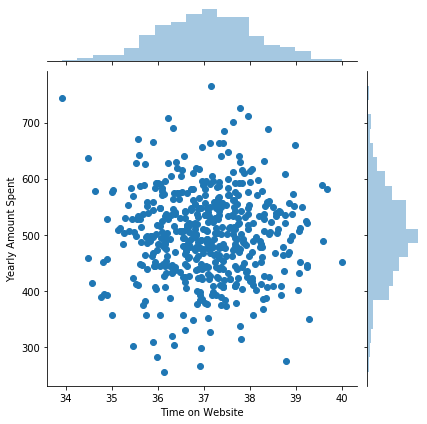

In [77]:
sns.jointplot(df["Time on Website"], df["Yearly Amount Spent"])

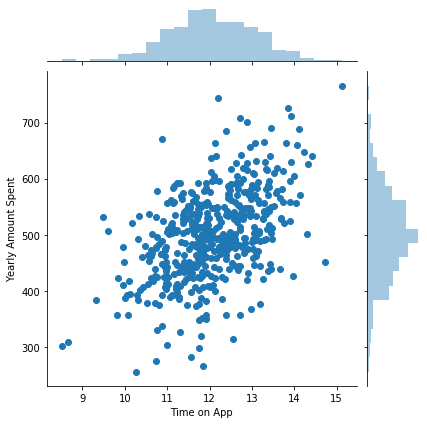

In [78]:
sns.jointplot(df["Time on App"], df["Yearly Amount Spent"])

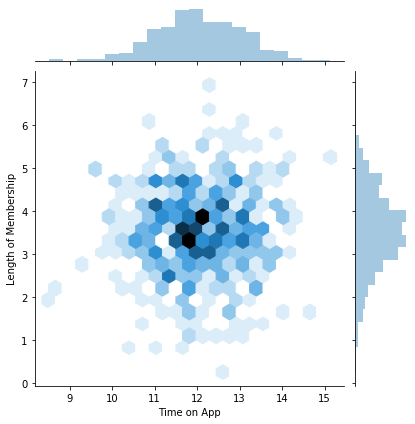

In [79]:
sns.jointplot(df["Time on App"], df["Length of Membership"], kind="hex")

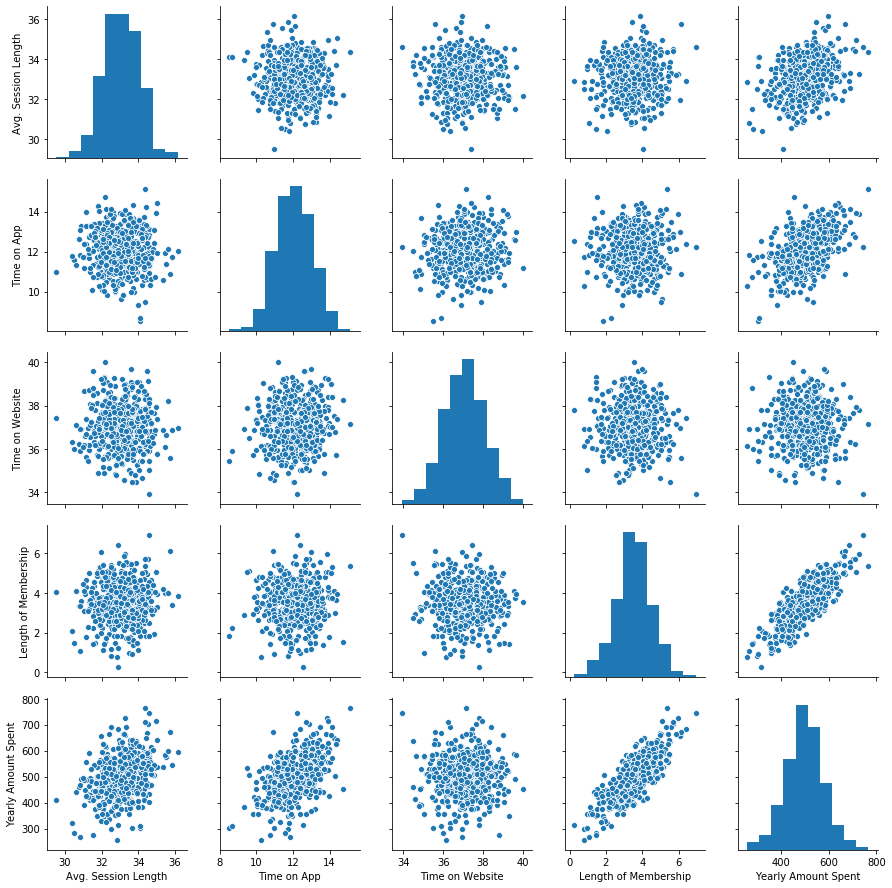

In [80]:
sns.pairplot(df)

In [81]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df[["Yearly Amount Spent"]]

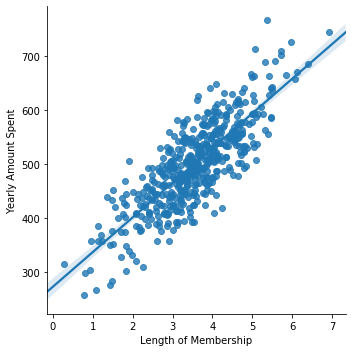

In [82]:
sns.lmplot('Length of Membership', "Yearly Amount Spent", df)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
md = LinearRegression()

In [87]:
md.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
md.coef_

array([[25.46665895, 38.51450422,  0.44360068, 61.70950686]])

In [89]:
predictions = md.predict(X_test)

In [90]:
import matplotlib.pyplot as plt

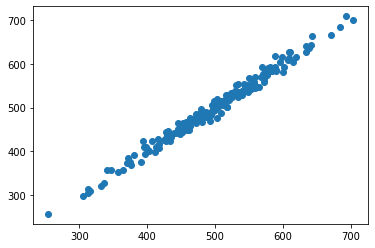

In [91]:
plt.scatter(predictions, y_test)

In [92]:
from sklearn import metrics

In [93]:
metrics.mean_absolute_error(predictions, y_test)

7.611585695579664

In [94]:
metrics.mean_squared_error(predictions, y_test)

95.00011922502588

In [95]:
np.sqrt(metrics.mean_squared_error(predictions, y_test))

9.746800460921824

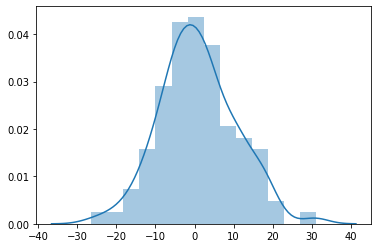

In [96]:
sns.distplot( y_test- predictions)

In [97]:
metrics.explained_variance_score(predictions, y_test) # This mean our model cover 98% data in our test set

0.9846388835284688

In [98]:
np.square(y_test - predictions - np.mean(y_test-predictions)).describe()

,Yearly Amount Spent
count,200.000000
mean,94.278367
std,141.962089
min,0.003364
25%,7.330446
50%,36.652176
75%,118.429480
max,921.306468


In [103]:
cdf = pd.DataFrame(md.coef_[0], X.columns, columns=["Coef"])
cdf

,Coef
Avg. Session Length,25.466659
Time on App,38.514504
Time on Website,0.443601
Length of Membership,61.709507
